# Binary Classification
# MultiClass Classification
# MultiLabel Classification

| Hyperparameter                 | Binary Classification        | MultiClass Classification    | MultiLabel Classification      |
| ------------------------------ | -----------------------------| -----------------------------| ------------------------------ |
| **Number of Classes**          | 2 (binary)                   | More than 2                  | More than 1 (multiple labels)  |
| **Input Layer Shape**          | Features                     | Features                     | Features                       |
| **Hidden Layers**              | 1 or more                    | 1 or more                    | 1 or more                      |
| **Neurons per Hidden Layer**   | 64, 128, 256, etc.           | 64, 128, 256, etc.           | 64, 128, 256, etc.             |
| **Output Layer Shape**         | 1                            | Number of classes            | Number of labels               |
| **Hidden Activation**          | ReLU or other activation     | ReLU or other activation     | ReLU or other activation       |
| **Output Activation**          | Sigmoid                      | Softmax                      | Sigmoid (per label)            |
| **Loss Function**              | Binary Cross-Entropy         | Categorical Cross-Entropy    | Binary Cross-Entropy per label |
| **Optimizer**                  | Adam, SGD, etc.              | Adam, SGD, etc.              | Adam, SGD, etc.                |
| **Decision Threshold**         | Typically 0.5                | -                            | -                              |
| **One-Hot Encoding**           | Not needed                   | Needed for target variable   | Needed for each label          |
| **Example Libraries/Models**   | Logistic Regression, SVM     | Logistic Regression, CNN     | Binary Relevance, MLkNN, etc.  |
| **Common Evaluation Metrics**  | Accuracy, Precision, Recall  | Accuracy, Precision, Recall  | Precision, Recall, F1-score    |



The Stochastic Gradient Descent (SGD) update rule is given by the equation $( \theta_{i+1} = \theta_i - \alpha \nabla J(\theta_i, x^{(i)}, y^{(i)}))$, where:
- $( \theta_i )$ is the parameter vector at iteration $( i)$,
- $( \alpha )$ is the learning rate (a positive scalar),
- $( J(\theta_i, x^{(i)}, y^{(i)}) )$ is the loss function,
- $( \nabla J(\theta_i, x^{(i)}, y^{(i)}) )$ is the gradient of the loss function with respect to the parameters $( \theta_i )$.

The Adam optimization algorithm updates the parameters $ \theta $ using the following equation:

$ \theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t $

where:
- $ \theta_t $ is the parameter vector at time step $ t $,
- $ \alpha $ is the learning rate,
- $ \hat{m}_t $ is the biased first moment estimate,
- $ \hat{v}_t $ is the biased second raw moment estimate,
- $ \epsilon $ is a small constant for numerical stability.
# https://playground.tensorflow.org

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
from sklearn.datasets import *
from keras.utils import plot_model
from sklearn.model_selection import train_test_split as ts_split



In [2]:
# Making a data set
SEED = 42
samples = 1000
plt.rcParams["figure.figsize"] = (7,7)
tf.random.set_seed(SEED)
X, Y = make_circles(samples, noise=0.03, random_state=SEED)



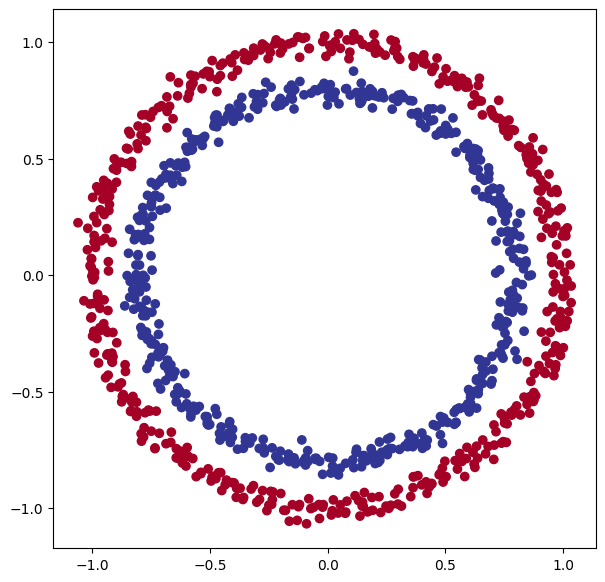

In [3]:
plt.scatter(X[:,0],X[:,1], c=Y,cmap=plt.cm.RdYlBu)

# Classify whether blue or red




32/32 [==============================] - 1s 4ms/step - loss: 0.0011 - accuracy: 1.0000


<Axes: >

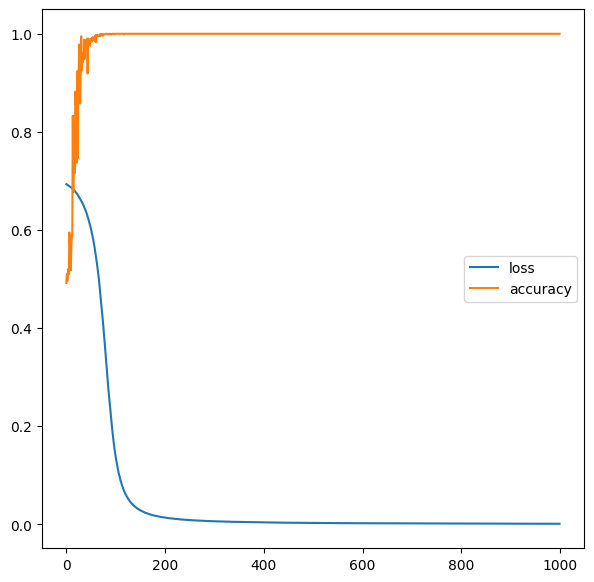

In [4]:
model = keras.Sequential([
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
    ])

model.compile(loss=keras.losses.BinaryCrossentropy(),
               optimizer=keras.optimizers.SGD(learning_rate=0.01),
               metrics=["accuracy"])
c = model.fit(X, Y, epochs=1000, verbose=0)
model.evaluate(X, Y)
pd.DataFrame(c.history).plot()

In [5]:
def plot(model, X=X, y=Y):
    x_max, x_min = X[:, 0].max() + 0.1, X[:, 0].min() - 0.1
    y_max, y_min = X[:, 1].max() + 0.1, X[:, 1].min() - 0.1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    x_in = np.c_[xx.ravel(), yy.ravel()]
    pred = model.predict(x_in)
    
    if len(pred[0]) > 1:
        print("Multiclass")
        pred = np.argmax(pred, axis=1).reshape(xx.shape)
    else:
        print("Binary")
        pred = np.round(pred).reshape(xx.shape)
    
    plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



313/313 [==============================] - 1s 3ms/step
Binary


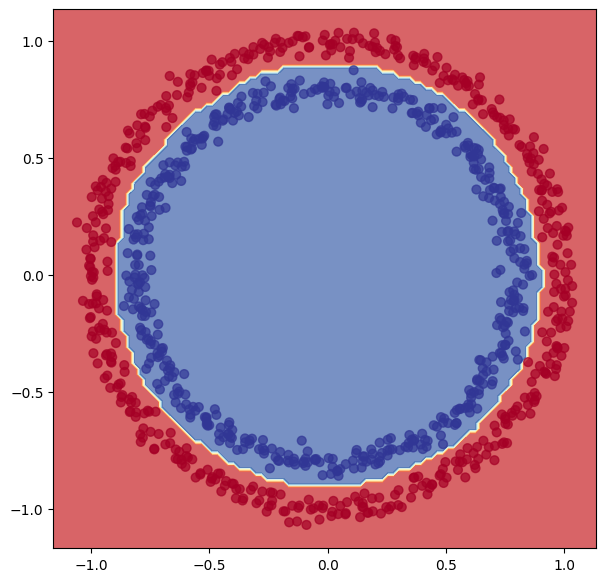

In [6]:
plot(model)